In this notebook you'll be using [Spotipy](https://github.com/spotipy-dev/spotipy), a Python package, to talk to the Spotify API. This means you won't have to manually create API URLs, you'll just need to figure out how to make Spotipy do it for you! The full Spotipy documentation is available at [https://spotipy.readthedocs.io/](https://spotipy.readthedocs.io/)

# To access *public* Spotify data

You'll want to go to the [Spotify for Developers Dashboard](https://developer.spotify.com/dashboard) and create a new app. This will give you a `client_id` and `client_secret`! It's like a super-advanced version of an API key. When you're setting up your app it will probably also ask you for other things like a redirect URL - just put whatever you want in there, it doesn't matter. If it asks what you want access to, you can pick the Web API (but I don't think it matters).

> The code below won't work since it's *my* secret keys. I've deleted them so that this notebook is nice and safe for me!

In [1]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="b9f3ee83dcd84073ae7ac3642c1a562e",
    client_secret="d6a941897e824a3d9beb0a69409fc91a",
))

When you want data from Spotify, you can't just go to `/artists/Pixies` in order to get work by Pixies! You have to find a special code for the artist (or song, or album, or whatever). It's called the `uri`.

> You can find more details on searching [on the Spotipy documentation](https://spotipy.readthedocs.io/en/2.22.1/#spotipy.client.Spotify.search) or the [Spotify Web API documentation](https://developer.spotify.com/documentation/web-api/reference/search). Remember that Spotipy is a Python wrapper for the Spotify API, so you don't need to work with any URLs!

To find the `uri`, you first need to do a search. Below we use `spotify.search` to search for a particular artist.

In [2]:
# Search for the artist Pixies
results = spotify.search(q='artist:Fountains of Wayne', type='artist')

The `results` it shows us is awful and long and terrible. Instead of showing you how to do that, I already poked through it and found the top artist result from our search.

In [3]:
results['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1pgtr4nhBQjp9oCUBPyYWh'},
 'followers': {'href': None, 'total': 188440},
 'genres': ['pop rock', 'power pop'],
 'href': 'https://api.spotify.com/v1/artists/1pgtr4nhBQjp9oCUBPyYWh',
 'id': '1pgtr4nhBQjp9oCUBPyYWh',
 'images': [{'height': 625,
   'url': 'https://i.scdn.co/image/fe75e6f4ba0b2e75e97e3505f9daa112a606977f',
   'width': 1000},
  {'height': 400,
   'url': 'https://i.scdn.co/image/67bac75239a54443a6abc5a3a367cd9321ad5f97',
   'width': 640},
  {'height': 125,
   'url': 'https://i.scdn.co/image/7f58b2862ef9f7441ca3b424e709578cc14775dd',
   'width': 200},
  {'height': 40,
   'url': 'https://i.scdn.co/image/0f66b137c865c7d6e74d567b4fe732d00fe423ed',
   'width': 64}],
 'name': 'Fountains Of Wayne',
 'popularity': 57,
 'type': 'artist',
 'uri': 'spotify:artist:1pgtr4nhBQjp9oCUBPyYWh'}

There we go! The `uri` looks to be `spotify:artist:6zvul52xwTWzilBZl6BUbT`.

Now the sad part: the Spotipy documentation is...... not great. The Spotify Web API docs look good, *but* we're using the Python wrapper, not the raw Spotify API! Luckily Spotipy has a great [list of examples](https://github.com/spotipy-dev/spotipy/tree/master/examples), including one for [an artist's top tracks](https://github.com/spotipy-dev/spotipy/blob/master/examples/simple_artist_top_tracks.py).

```python
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
```

Since we already have the credentials and blah blah blah set up, all we need to do is adapt the `sp.artist_top_tracks(lz_uri)` line and everything below it.

In [4]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

spotipy_client_id="b9f3ee83dcd84073ae7ac3642c1a562e"
spotipy_client_secret="d6a941897e824a3d9beb0a69409fc91a"

lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [5]:
results = sp.artist_top_tracks('spotify:artist:6zvul52xwTWzilBZl6BUbT')

for track in results['tracks'][:10]:
    print(track['name'])

NameError: name 'sp' is not defined

and after all of this ...**it turns out you can't get the play count!** Instead, you need to get the *popularity*.

That might be fine by you, but...

## But if you you *really really really* want the play count

When you visit [Spotify on the web](https://open.spotify.com/artist/6zvul52xwTWzilBZl6BUbT) you can see play counts! It's definitely a fancy web application and not a simple website, so we'll fire up Playwright...

In [6]:
from playwright.async_api import async_playwright

In [7]:
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

...visit the page in the browser...

In [ ]:
await page.goto('https://open.spotify.com/artist/6zvul52xwTWzilBZl6BUbT')

and feed the contents into BeautifulSoup.

In [ ]:
from bs4 import BeautifulSoup

doc = BeautifulSoup(await page.content())

Now that it's in BeautifulSoup, we need to find something to identify each one of these rows...

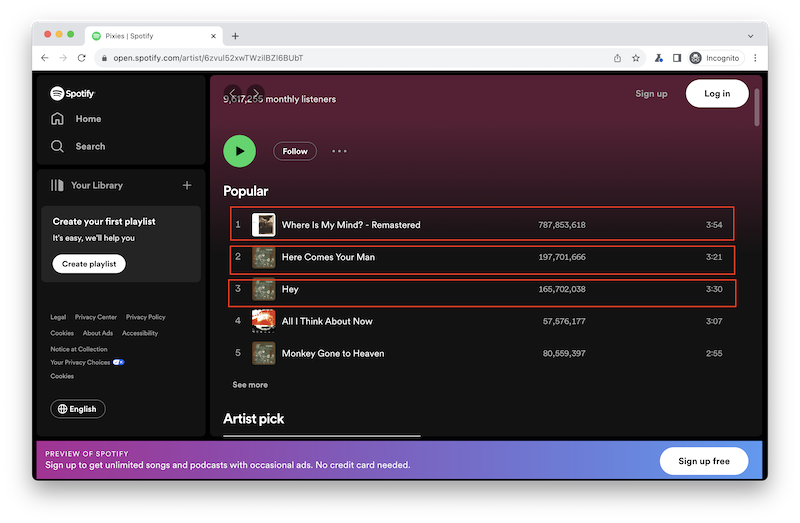

Selecting this way instead of just grabbing the titles will allow us to keep titles and play count for the same songs together.

In [ ]:
# You'd need to fill in the ??????????
#print(doc)
top_songs = doc.find_all('div', role = 'row')

In [ ]:
print(top_songs)

Once we find that, we'll need to find a class for the song titles and the play counts.

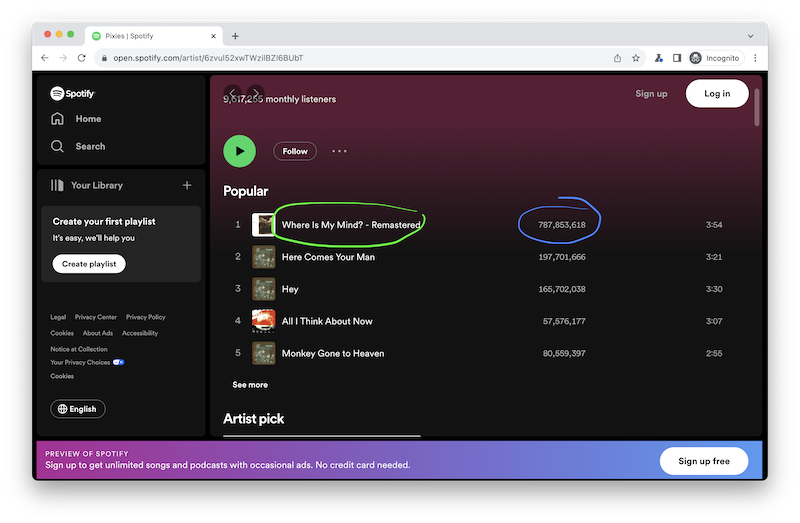

> **Note:** Remember that when it says `class="something ABC123 lkfm23f"` that is a class of `something` *and* the class of `ABC123` *and* the class of `lkfm23f`. So you can just use `.find(class_='ABC123')` and it will work fine!

In [ ]:
# You need to fill in the ??????????

for song in top_songs:
    title = song.find(class_ = 'encore-text encore-text-body-medium encore-internal-color-text-base btE2c3IKaOXZ4VNAb8WQ standalone-ellipsis-one-line').text
    play_count = song.find(class_ = 'encore-text encore-text-body-small HxDMwNr5oCxTOyqt85gi').text
    
    print(title, play_count)

Finally, to wrap it all up, we need to edit the code above to create a **list of dictionaries** that we can put into a pandas dataframe and save to a CSV.

# To access user data

Sometimes when using Spotify you want to know things about the user on the computer: for example, their saved tracks, their playlists, or more. To do this you need to ask for special permissions (or the `scope`). In the example below we use `user-library-read`, which allows you to look at someone's saved tracks.

You can find what information can be retrieved about a user by scrolling around on the Spotify Web API documentation and looking for **Get Current User's XXXXXX**.

Some of them will probably need permissions that aren't `user-library-read`, you can look at [Spotify Web API's list of scopes](https://developer.spotify.com/documentation/web-api/concepts/scopes) to see what other scopes might be required.

## Ask for permission to look at the user's information

You'll need to get a `client_id` and `client_secret` from the [Spotify for Developers Dashboard](https://developer.spotify.com/dashboard). You can use anything for the `redirect_uri` – fancy websites will use this to direct users back to their site, but you're just running this code on your own computer.

In [78]:
from spotipy.oauth2 import SpotifyOAuth

scope='user-library-read'

oauth = SpotifyOAuth(
    client_id='62a0cb479d8246ec91d207e045f1b69e',
    client_secret='b3addc96a269419aad009bc7b92f56fe',
    redirect_uri='https://localhost:8080',
    scope=scope
)
sp = spotipy.Spotify(auth_manager=oauth)

**Let's see what user we're logged in as!**

This line will start you talking to the Spotify API, logging in, accepting permissions, etc.

## Getting data from the user

In the example below, we get 20 saved tracks from the logged-in user. We are allowed to do this because we provided the `user-library-read` scope up above.

In [ ]:
tracks = sp.current_user_saved_tracks(limit=20)
tracks

Okay, so how do we know what to do now?

Right now you're using **Spotipy**, a Python wrapper for the Spotify Web API. You should use the Spotipy documentation for all of your code examples, but the Spotify Web API documentation might inspire you on different ways to *use* the Spotipy library. Below you can compare the documentation for getting the current user's saved tracks:

- **Spotipy documentation:** https://spotipy.readthedocs.io/en/2.22.1/?highlight=current_user_saved_tracks#spotipy.client.Spotify.current_user_saved_tracks
- **Spotify Web API documentation:** https://developer.spotify.com/documentation/web-api/reference/get-users-saved-tracks

In order to get **all of the saved tracks,** I recommend checking out my YouTube video on how to use paginated APIs at https://www.youtube.com/watch?v=4Fdyft-ky0w. Your code is going to be a little different since your aren't using `requests.get` and a URL to get the information from the API – instead you are using `sp.current_user_saved_tracks`.

You can also start with just the 20 there (or 50, if you change the `limit`) if you'd rather. To get tracks, you'll use `limit`, `offset` and `range`.